In [1]:
import Classifier
m=Classifier.Classifier()

Classifier
Cost
Activation
self
Cost
Activation


In [5]:
import pandas as pd
df=pd.read_csv(r"test/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


 The data is distributed as:
                age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373

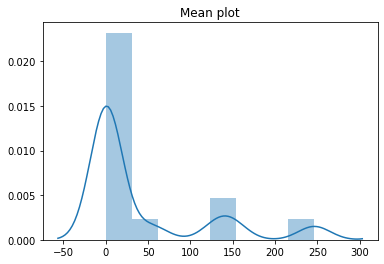

 


The variance of various attributes are:
  age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64


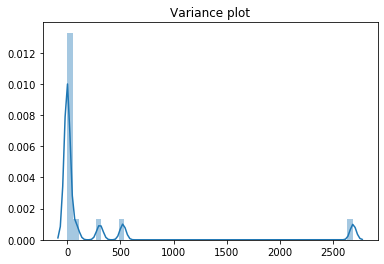

 


The correlation between various attributes:
  


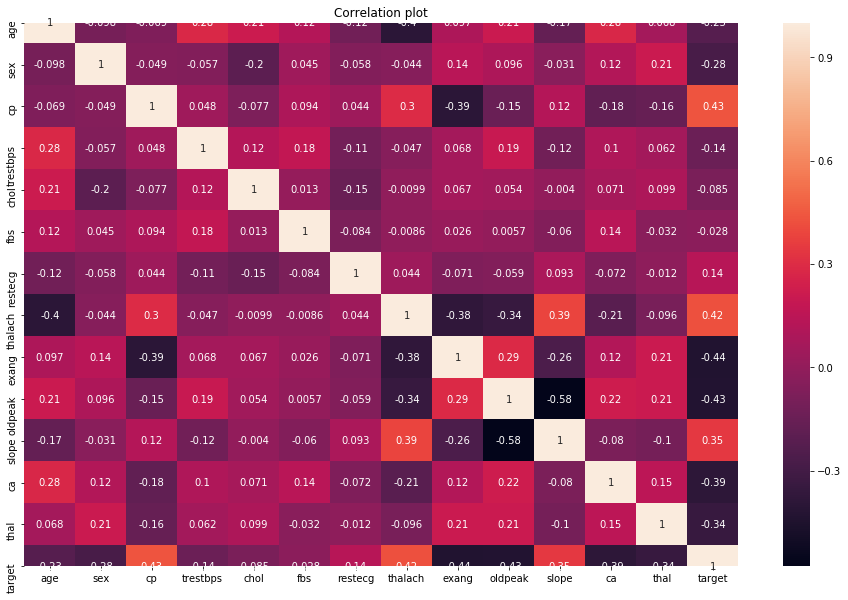

 


The skewness in various attributes of data:
  age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64


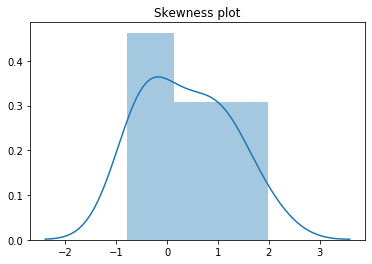

 


The kurtosis in various attributes of data:
  age        -0.542167
sex        -1.382961
cp         -1.193071
trestbps    0.929054
chol        4.505423
fbs         1.959678
restecg    -1.362673
thalach    -0.061970
exang      -1.458317
oldpeak     1.575813
slope      -0.627521
ca          0.839253
thal        0.297915
target     -1.980783
dtype: float64


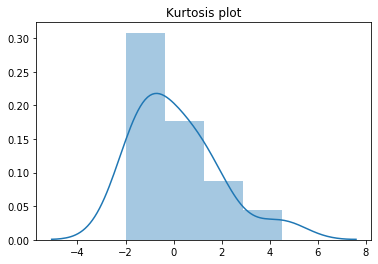

In [6]:
from meta_functions import data_description
data_description(df)

In [14]:
from sklearn.model_selection import train_test_split
c=list(df)
train_X,test_X,train_Y,test_Y = train_test_split( df[c[:-1]], df[c[-1]], test_size=0.33, random_state=42)

In [15]:
train_X=train_X.to_numpy()
test_X=test_X.to_numpy()
train_Y=train_Y.to_numpy()
test_Y=test_Y.to_numpy()
test_Y.shape

(100,)

In [16]:
test_X.shape

(100, 13)

In [20]:
train_X=train_X.reshape(13,203)
train_Y=train_Y.reshape(1,203)
test_X=test_X.reshape(13,100)
test_Y=test_Y.reshape(1,100)

In [21]:
layers_dims = [train_X.shape[0],7,3,1]

Cost after iteration 0: 0.693130
Cost after iteration 100: 0.691685
Cost after iteration 200: 0.691678
Cost after iteration 300: 0.691678


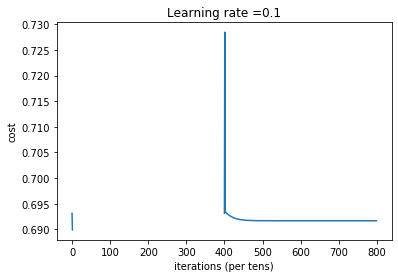

In [22]:
parameters = m.Train(X=train_X, Y=train_Y, layers_dims= layers_dims,print_cost = True,learning_rate=0.1, num_iterations=400)

In [26]:
def predict(X, parameters):

    AL,caches = m.L_model_forward(X, parameters)
    predictions = AL > 0.5

    return predictions

In [27]:
import numpy as np
#Train Accuracy
predictions = predict(train_X, parameters)
print ('Accuracy: %d' % float((np.dot(train_Y,predictions.T) + np.dot(1-train_Y,1-predictions.T))/float(train_Y.size)*100) + '%')

Accuracy: 52%


In [28]:
# Print accuracy
predictions = predict(test_X, parameters)
print ('Accuracy: %d' % float((np.dot(test_Y,predictions.T) + np.dot(1-test_Y,1-predictions.T))/float(test_Y.size)*100) + '%')

Accuracy: 57%


C:\Users\DELL\Desktop\Minor 2\rep.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  parameters[i]=parameters[i] - parameters[i].min()/(parameters[i].max()-parameters[i].min())


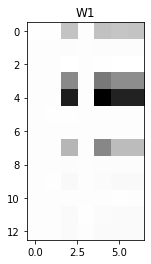

    Percentage Contribution
0                  7.706727
1                  3.678019
2                  4.132514
3                 16.289532
4                 32.029080
5                  3.855230
6                  3.821407
7                 10.809835
8                  3.665862
9                  3.339143
10                 3.839535
11                 3.435949
12                 3.397168


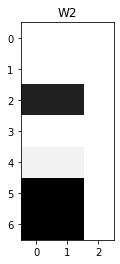

   Percentage Contribution
0                 0.655415
1                 0.658339
2                29.279280
3                 0.654198
4                 1.576790
5                33.632658
6                33.543320


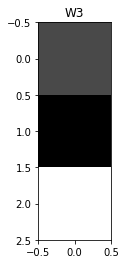

   Percentage Contribution
0                18.672684
1                42.067218
2                39.260097


In [29]:
import rep
rep.represent(parameters)